In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')


Mounted at /content/gdrive


(360, 360, 3)


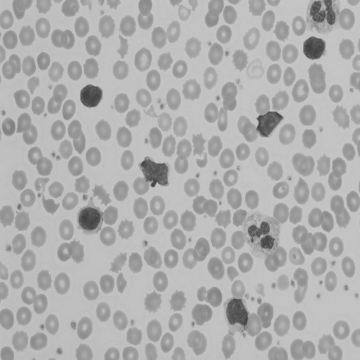

In [50]:
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell-bright.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')
print(img.shape)
gimg1=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

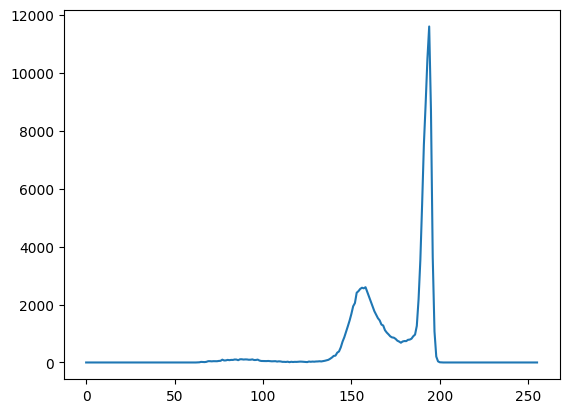

In [51]:
hist = cv2.calcHist([gimg1],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [52]:
gpoint = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

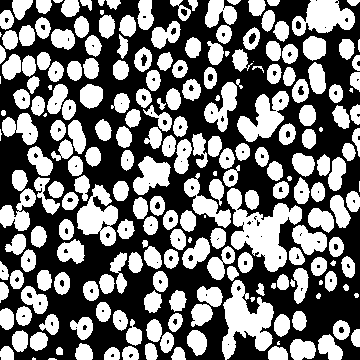

In [61]:
Threshold = 180
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h,w] > Threshold:
      gPoint[h,w] = 0
    else:
      gPoint[h,w] = 255
cv2_imshow(gPoint)

In [57]:
T1= 128
T2 = 0
T0 = 1

In [64]:
def Threshold_update(img, bimg):
    sum1 = 0
    count1 = 1
    sum2 = 0
    count2 = 1

    for h in range(img.shape[0]):
        for w in range(img.shape[1]):
            if(bimg[h, w] == 0):
                sum1 = np.int32(sum1 + img[h, w])
                count1 += 1
            else:
                sum2 = np.int32(sum2 + img[h, w])
                count2 += 1

    avg1 = sum1/count1
    avg2 = sum2/count2

    T = (avg1 + avg2)/2

    return T

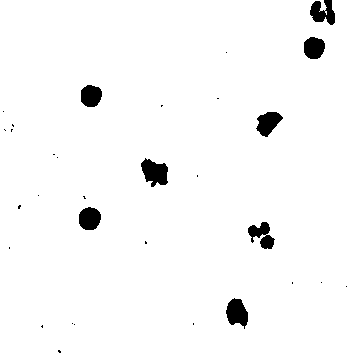

In [67]:
for h in range(gimg1.shape[0]):
    for w in range(gimg1.shape[1]):
        if gimg1[h, w] > T1:
            gpoint[h, w] = 255
        else:
            gpoint[h, w] = 0
cv2_imshow(gpoint)

134.59252679430028
135.8438133114146
136.17863236783603
136.17863236783603


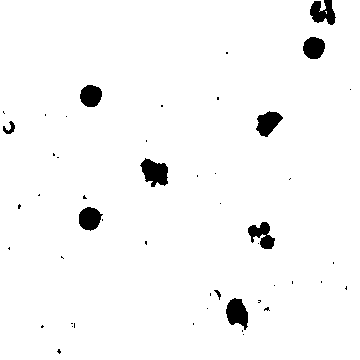

In [70]:
while True:
    T2 = Threshold_update(gimg1, gpoint)
    print(T2)

    if (np.abs(T2 - T1) < T0):
        break
    else:
        T1 = T2
        for h in range(gimg1.shape[0]):
            for w in range(gimg1.shape[1]):
                if gimg1[h, w] > T1:
                    gpoint[h, w] = 255
                else:
                    gpoint[h, w] = 0

print(T2)
cv2_imshow(gpoint)